# CSTAT Lab #8
This is the eighth lab of the computaitonal statistics course, covering ARIMA models, seasonal ARIMA models and forecasting.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

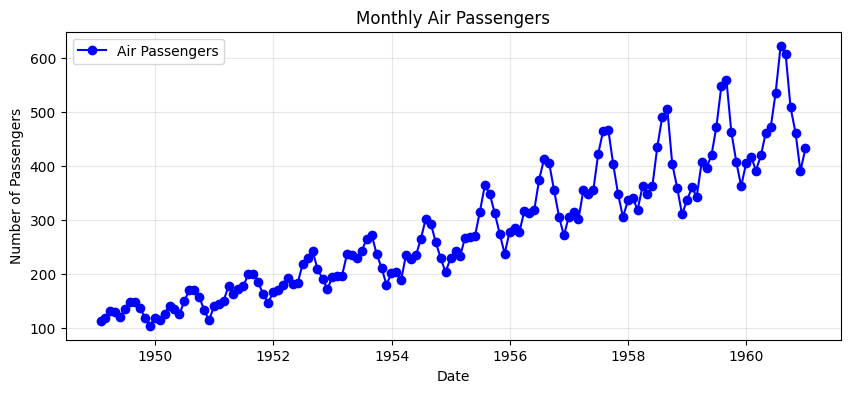

In [4]:
air_data = sm.datasets.get_rdataset("AirPassengers", "datasets", cache=True).data
df_air = air_data.copy()
start_year = int(df_air['time'].iloc[0])
n_points = len(df_air)
df_air.index = pd.date_range(start=f"{start_year}-01", periods=n_points, freq="ME")
df_air.drop(columns='time', inplace=True, errors='ignore')
df_air.columns = ['AirPassengers']
df_air.index.name = 'Date'

plt.figure(figsize=(10, 4))
plt.plot(df_air, label='Air Passengers', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


Returning to the air passengers dataset from Lab 7, we will attempt to model this time series. 
Starting with differencing, to find out if our series contains seasonality or a trend. Difference the time series once and check if the (linear) trend is removed by getting the p-value of the linear regression coefficient. 

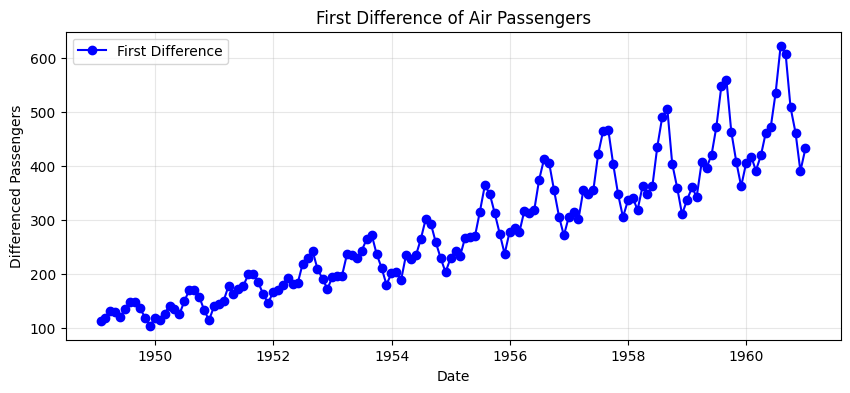

AttributeError: 'ellipsis' object has no attribute 'pvalues'

In [9]:
# First difference of Air Passengers data
df_air_diff = ...
df_air_diff = df_air.dropna()

# Plot first differenced series
plt.figure(figsize=(10, 4))
plt.plot(df_air_diff, label='First Difference', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('First Difference of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()


# Linear regression for original series
X_orig = ...
X_orig_const = ...
model_orig = ...
original_p_values = model_orig.pvalues[1]
print(f"Original series trend p-value: {original_p_values:.4f}")

# Linear regression for first differenced series
X_diff = ...
X_diff_const = ...
model_diff = ...
differenced_p_values = model_diff.pvalues[1]
print(f"First differenced series trend p-value: {differenced_p_values:.4f}")

Let us move on to the seasonal component, identify the period in months from the overall time series graph.

Write out the formula for the combined differenced $(1-B)(1-B^{period})X_t = ...$ 

Compute the combined difference manually using the above formula in the code below.

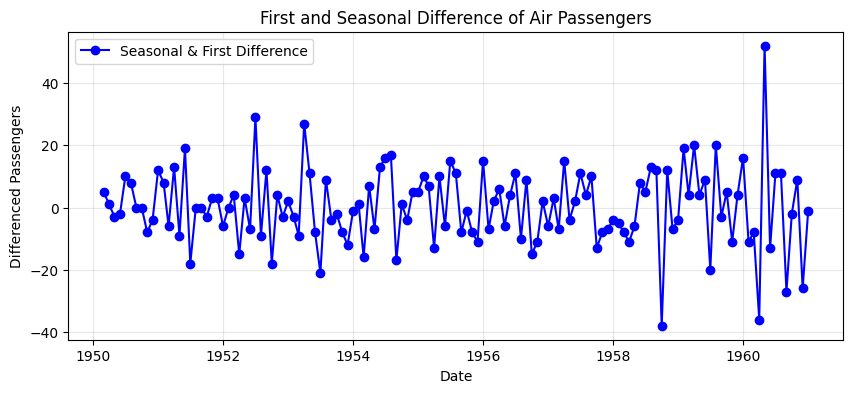

In [ ]:
combined_diff = ...
combined_diff = combined_diff.dropna()

plt.figure(figsize=(10, 4))
plt.plot(combined_diff, label='Seasonal & First Difference', marker='o', linestyle='-', color='blue')
plt.grid(True, alpha=0.3)
plt.title('First and Seasonal Difference of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()


Does our first differenced (trend removal) and period differenced (seasonality removal) series resemble white noise? 
Plot the ACF and PACF of the combined differenced series and verify if there is any remaining structure in the data. 

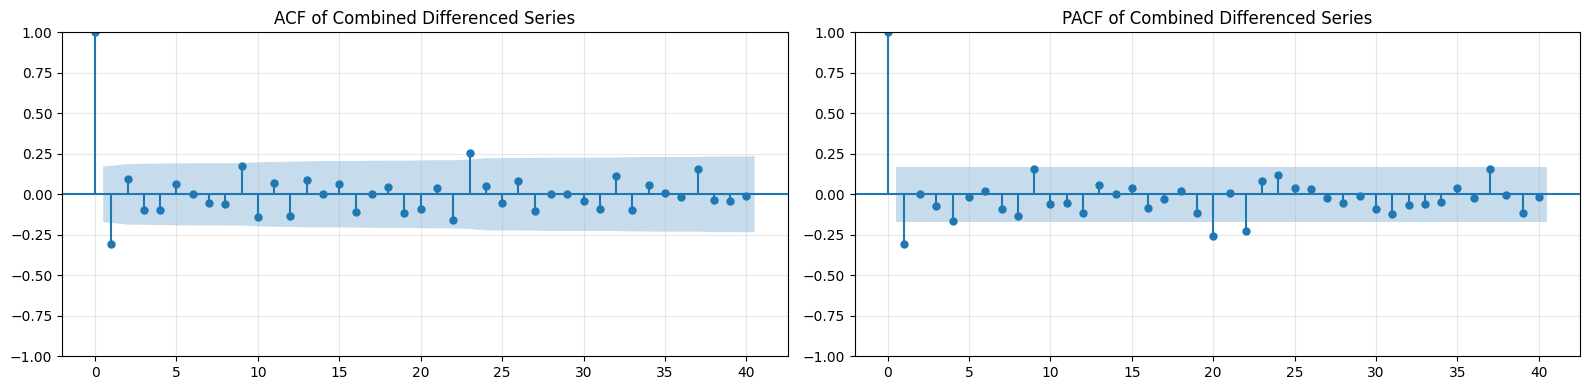

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
...
axes[0].set_title('ACF of Combined Differenced Series')
axes[0].grid(True, alpha=0.3)

# PACF plot
...
axes[1].set_title('PACF of Combined Differenced Series')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Next, plot the ACF and PACF of the original Air Passengers time series. 

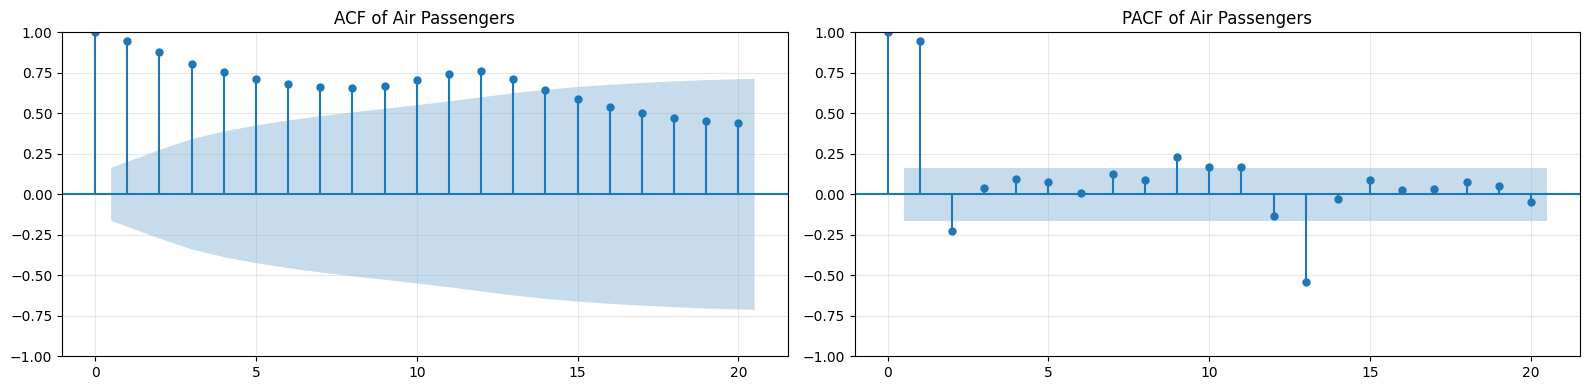

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
...
axes[0].set_title('ACF of Air Passengers')
axes[0].grid(True, alpha=0.3)

# PACF plot
...
axes[1].set_title('PACF of Air Passengers')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Determine what ARIMA models would fit this data, so determine p,d,q for ARIMA(p,d,q), without considering seasonality by inspecting the ACF and PACF.


Fit the ARIMA models and plot their residuals, residual ACF and PACFs. 

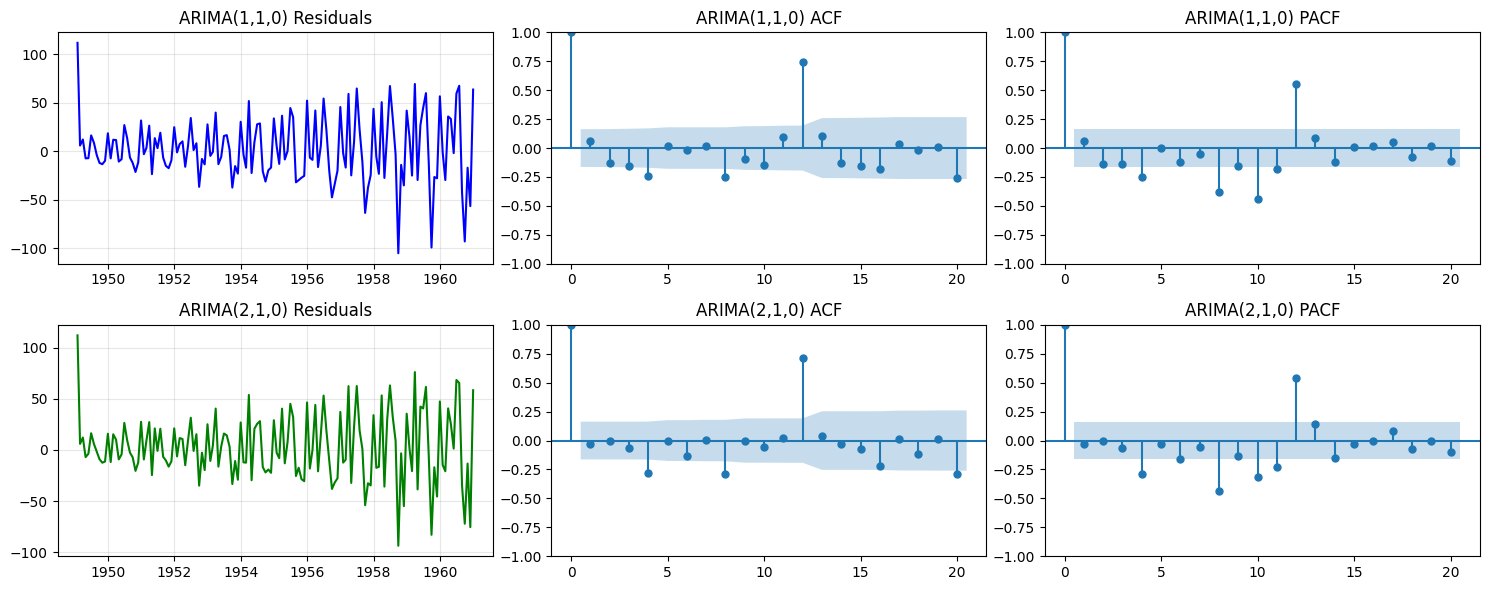

                               SARIMAX Results                                
Dep. Variable:          AirPassengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Mon, 21 Apr 2025   AIC                           1401.852
Time:                        15:56:39   BIC                           1407.778
Sample:                    01-31-1949   HQIC                          1404.260
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
Ljung-Box (L1) (Q):                   0.66   Jarque-

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit model
model_arima_1 = ARIMA(df_air['AirPassengers'], order=...
                      , trend='n').fit()
resid_1 = model_arima_1.resid.dropna()

# Possibly fit a second model with different parameters
model_arima_2 = ARIMA(df_air['AirPassengers'], order=...
                      , trend='n').fit()
resid_2 = model_arima_2.resid.dropna()

# Plot residuals, ACF and PACF
...

# Print summary of the fitted model 


See if you can determine which of the models fits the data best from the model summary based upon the criteria mentioned in the lecture:
1. Significance of coefficients
2. ACF of residuals
3. Box-Pierce (Ljung) tests

Next, we integrate the seasonality in our model by adding a seasonal component (SARIMA) and comparing the models.

Search for the best SARIMA model using your ARIMA(p,d,q) model above. 

So for your $ARIMA(p,d,q)$, find $(p_s,d_s,q_s)$ in $SARIMA(p,d,q)(p_s,d_s,q_s,period)$ by searching over the possible seasonal orders in the code below and plugging in your ARIMA order in the for-loop. 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
seasonal_orders = [
    (1, 1, 0, 12),  # seasonal AR(1), seasonal differencing, seasonal MA(0)
    ...,
    ...
]

for s_order in seasonal_orders:
    model = SARIMAX(df_air['AirPassengers'],
                    order=...,
                    seasonal_order=s_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit(disp=False)
    
    print(f"Seasonal order: {s_order} → AIC: {model.aic:.2f}")
    print(f"All coefficients significant: {all(model.pvalues < 0.05)}")



Seasonal order: (1, 1, 0, 12) → AIC: 927.59
All coefficients significant: False
Seasonal order: (0, 1, 1, 12) → AIC: 928.13
All coefficients significant: False
Seasonal order: (1, 1, 1, 12) → AIC: 928.14
All coefficients significant: False
Seasonal order: (1, 0, 0, 12) → AIC: 1007.65
All coefficients significant: True
Seasonal order: (0, 0, 1, 12) → AIC: 1190.53
All coefficients significant: True
Seasonal order: (1, 0, 1, 12) → AIC: 995.46
All coefficients significant: True


Finally, we do a 'horserace' with our viable models. In the code block below, create lists of the likely ARIMA and seasonal orders. 
Also plug in the formula for the forecast error. 

                                  Model  Forecast Error Variance
0  ARIMA(2, 1, 0) x SARIMA(1, 0, 1, 12)               281.114200
1  ARIMA(1, 1, 0) x SARIMA(1, 0, 1, 12)               289.135210
2  ARIMA(1, 1, 0) x SARIMA(1, 0, 0, 12)               300.364116
3  ARIMA(2, 1, 0) x SARIMA(1, 0, 0, 12)               306.380441
4  ARIMA(1, 1, 0) x SARIMA(0, 0, 1, 12)              1093.307828
5  ARIMA(2, 1, 0) x SARIMA(0, 0, 1, 12)              1132.048902


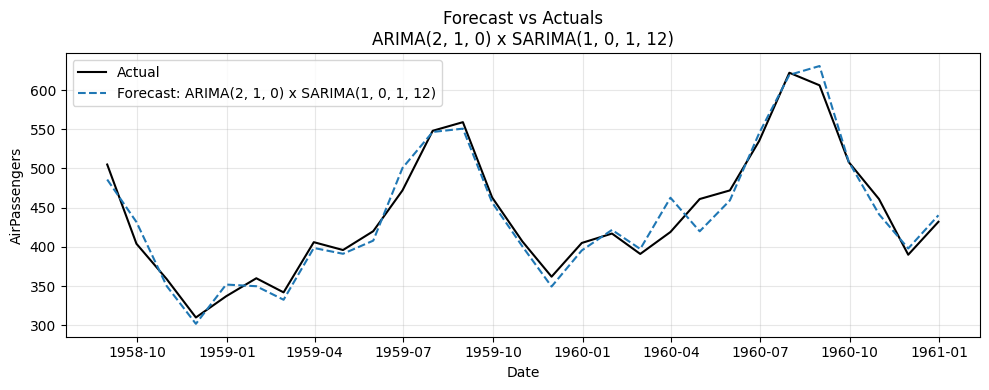

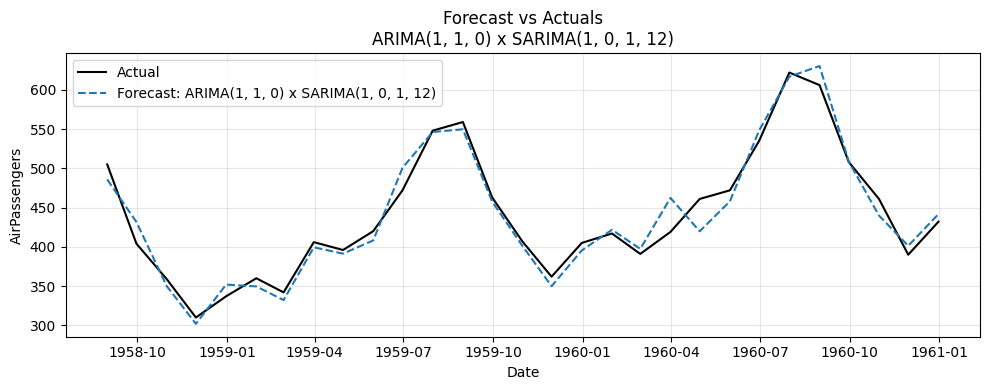

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split dataset
n = len(df_air)
split = int(n * 0.8)  # 80% for training, 20% for testing
train = df_air.iloc[:split]
test = df_air.iloc[split:]

# Specify combinations
non_seasonal_orders = [
    ...,
    ...
]

seasonal_orders = [
    ...,
    ...
]

# Dictionary to hold results
results = {}

# Loop over combinations
for ns_order in non_seasonal_orders:
    for s_order in seasonal_orders:
        label = f'ARIMA{ns_order} x SARIMA{s_order}'
        preds = []
        actuals = []
        history = train.copy()

        for t in range(len(test)):
            model = SARIMAX(history,
                            order=ns_order,
                            seasonal_order=s_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False).fit(disp=False)

            forecast = model.forecast(steps=1).iloc[0]
            actual = test['AirPassengers'].iloc[t]

            preds.append(forecast)
            actuals.append(actual)

            # Update history with actual
            history = pd.concat([history, test.iloc[[t]]])

        errors = ...
        var_error = ...

        results[label] = {
            'Forecasts': preds,
            'Actuals': actuals,
            'Errors': errors,
            'Variance of Forecast Error': var_error
        }

# Create summary DataFrame and get best two models
summary_df = pd.DataFrame([
    {'Model': name, 'Forecast Error Variance': res['Variance of Forecast Error']}
    for name, res in results.items()
]).sort_values('Forecast Error Variance').reset_index(drop=True)

print(summary_df)

# Plot only top 2 models
for name in summary_df['Model'][:2]:
    res = results[name]
    plt.figure(figsize=(10, 4))
    plt.plot(test.index, res['Actuals'], label='Actual', color='black')
    plt.plot(test.index, res['Forecasts'], label=f'Forecast: {name}', linestyle='--')
    plt.title(f'Forecast vs Actuals\n{name}')
    plt.xlabel('Date')
    plt.ylabel('AirPassengers')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()



Determine the best model in terms of forecast error. 